<a href="https://colab.research.google.com/github/HariOS92/guvi/blob/main/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("car_data.csv")
df.head()
print(df['Make'].unique())
print(df['Model'].unique())
print(df['Type'].unique())

['Buick' 'Cadillac' 'Chevrolet' 'Pontiac' 'SAAB' 'Saturn']
['Century' 'Lacrosse' 'Lesabre' 'Park Avenue' 'CST-V' 'CTS' 'Deville'
 'STS-V6' 'STS-V8' 'XLR-V8' 'AVEO' 'Cavalier' 'Classic' 'Cobalt'
 'Corvette' 'Impala' 'Malibu' 'Monte Carlo' 'Bonneville' 'G6' 'Grand Am'
 'Grand Prix' 'GTO' 'Sunfire' 'Vibe' '9_3' '9_3 HO' '9_5' '9_5 HO'
 '9-2X AWD' 'Ion' 'L Series']
['Sedan' 'Convertible' 'Hatchback' 'Coupe' 'Wagon']


Linear equation for milage to price is y=[-0.16320019]x1+[24539.55309176]


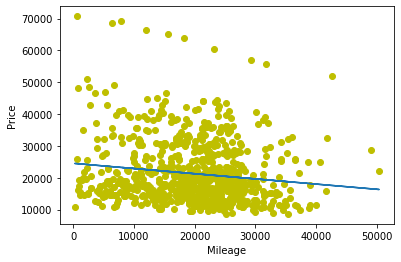

R2 score is 0.0260390915986366


In [5]:
#PART1
x1=df.iloc[:,1].values
y1=df.iloc[:,0].values
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2)
lr1=linear_model.LinearRegression()
x1_train=x1_train.reshape(-1,1)
y1_train=y1_train.reshape(-1,1)
x1_test=x1_test.reshape(-1,1)
lr1.fit(x1_train,y1_train)
y1_lin=lr1.coef_[0]*x1+lr1.intercept_
print("Linear equation for milage to price is y="+str(lr1.coef_[0])+"x1+"+str(lr1.intercept_))
plt.plot(x1,y1_lin)
plt.scatter(x=df['Mileage'],y=df['Price'],c="y")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()
y1_pred=lr1.predict(x1_test)
print("R2 score is",metrics.r2_score(y1_test,y1_pred))

In [25]:
#PART2
x2=df[['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']].to_numpy()
y2=df[['Price']].to_numpy()
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2,random_state=10)
lr2=linear_model.LinearRegression()
lr2.fit(x2_train,y2_train)
y_lin=""
for i in range(len(lr2.coef_[0]),0,-1):
  y_lin+=str(lr2.coef_[0][i-1])+"x"+str(i)
print("Linear equation is y="+y_lin+"+"+str(lr2.intercept_[0]))
y2_pred=lr2.predict(x2_test)
print("R2 score is",metrics.r2_score(y2_test,y2_pred))
from sklearn.feature_selection import RFE
ft_select=linear_model.LinearRegression()
selected=RFE(ft_select,n_features_to_select=4,step=1)
selected=selected.fit(x2_train,y2_train)
list(zip(['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather'],selected.support_))

Linear equation is y=3399.9413587521944x7-1819.145265687352x66219.092562824822x5-1402.4877103643605x4-425.69816863458277x33467.591623474918x2-0.13519317155122787x1+5983.744090102266
R2 score is 0.4645408706309192


[('Mileage', False),
 ('Cylinder', True),
 ('Liter', False),
 ('Doors', False),
 ('Cruise', True),
 ('Sound', True),
 ('Leather', True)]

With the features ('Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather') used in predicting Price in above model, the combination of Cylinder,Cruise,Sound,Leather helps in predicting Proce better

In [14]:
!pip install scikit-learn==0.24.2

     |████████████████████████████████| 22.3 MB 1.6 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.


In [14]:
#HARD
dummy_make=pd.get_dummies(df['Make'])
dummy_model=pd.get_dummies(df['Model'])
dummy_type=pd.get_dummies(df['Type'])
df_dummy=pd.concat([dummy_make,dummy_model,dummy_type,df['Price']],axis=1)
df_dummy.head()
xdummy=df_dummy.iloc[:,:-1].values
ydummy=df_dummy.iloc[:,-1].values
xdummy_train,xdummy_test,ydummy_train,ydummy_test=train_test_split(xdummy,ydummy,test_size=0.2,random_state=5)
from sklearn.feature_selection import SequentialFeatureSelector
dummy_select=SequentialFeatureSelector(linear_model.LinearRegression(),n_features_to_select=10)
dummy_select.fit(xdummy_train,ydummy_train)
list(zip(df_dummy.columns,dummy_select.get_support()))
#df_dummy.corr()

[('Buick', True),
 ('Cadillac', True),
 ('Chevrolet', False),
 ('Pontiac', False),
 ('SAAB', True),
 ('Saturn', False),
 ('9-2X AWD', False),
 ('9_3', False),
 ('9_3 HO', False),
 ('9_5', False),
 ('9_5 HO', False),
 ('AVEO', True),
 ('Bonneville', False),
 ('CST-V', False),
 ('CTS', True),
 ('Cavalier', True),
 ('Century', False),
 ('Classic', False),
 ('Cobalt', False),
 ('Corvette', True),
 ('Deville', False),
 ('G6', False),
 ('GTO', True),
 ('Grand Am', False),
 ('Grand Prix', False),
 ('Impala', False),
 ('Ion', False),
 ('L Series', False),
 ('Lacrosse', False),
 ('Lesabre', False),
 ('Malibu', False),
 ('Monte Carlo', False),
 ('Park Avenue', False),
 ('STS-V6', False),
 ('STS-V8', False),
 ('Sunfire', False),
 ('Vibe', False),
 ('XLR-V8', True),
 ('Convertible', True),
 ('Coupe', False),
 ('Hatchback', False),
 ('Sedan', False),
 ('Wagon', False)]